In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [42]:
data = pd.read_csv('../../dataset (missing + split)/trainFilledWithoutUselessFeatures.csv', skip_blank_lines=True)

In [43]:
data

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.536000,0.2810,0.6350,142.221,4.0,567.0,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,0.0805,0.283000,0.934000,0.3600,0.0336,75.596,4.0,617.0,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,1.0,0.0397,0.000089,0.800000,0.2620,0.4890,116.628,4.0,652.0,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.001270,0.1170,0.3850,140.880,4.0,619.0,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.096900,0.2990,0.6370,143.956,4.0,733.0,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,1.0,0.0558,0.016000,0.615000,0.1320,0.0335,117.319,4.0,837.0,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,1.0,0.0595,0.548000,0.940000,0.1230,0.0016,92.323,3.0,277.0,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,1.0,0.0594,0.001830,0.857000,0.0713,0.0708,126.000,4.0,837.0,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,1.0,0.0531,0.000337,0.000014,0.4020,0.2700,160.044,4.0,513.0,breakbeat


#The condition we implement is: more than 2 attributes classified as outliers. (3 or more)

In [44]:
#Let's create a column for the data set of all zeros to fill with the outliers
data['outliers'] = 0

In [45]:
for x in data.columns:
    if np.issubdtype(data[x].dtype, np.number) and len(data[x].unique()) > 5:
        #Handling missing values to check for changes
        #data[x].fillna(data[x].mean())
        #data.dropna(subset=[x], inplace=True)
        #Interquartile range
        Q1 = np.percentile(data[x], 25)
        Q3 = np.percentile(data[x], 75)
        IQR = Q3 - Q1

        #Lower and upper bound for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data.loc[((data[x] < lower_bound) | (data[x] > upper_bound)),'outliers'] = data['outliers']+1

In [46]:
data['outliers'].unique()
data.groupby('outliers').size().reset_index(name='Frequency')

,outliers,Frequency
0,0,10913
1,1,3324
2,2,602
3,4,141
4,5,19
5,6,1


In [47]:
#Creating the new df
#new_data = data[data['outliers']<2]
new_data = pd.DataFrame(data)

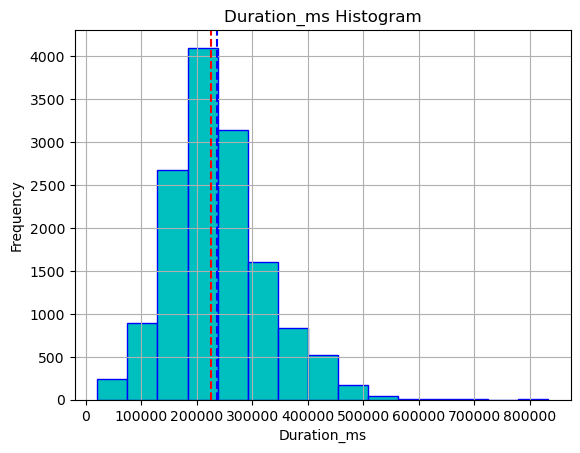

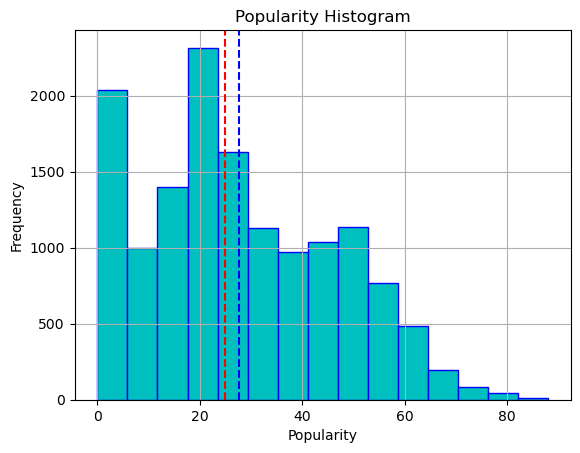

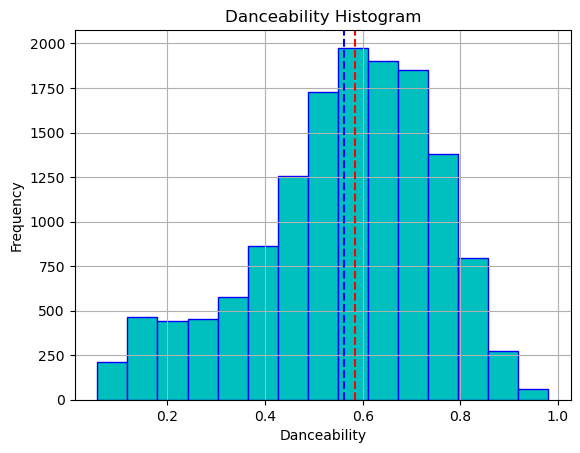

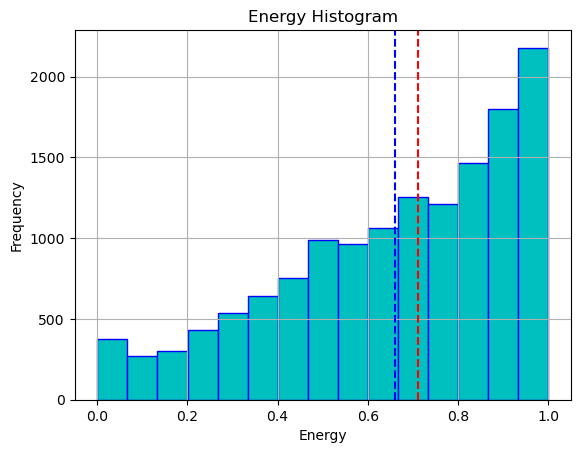

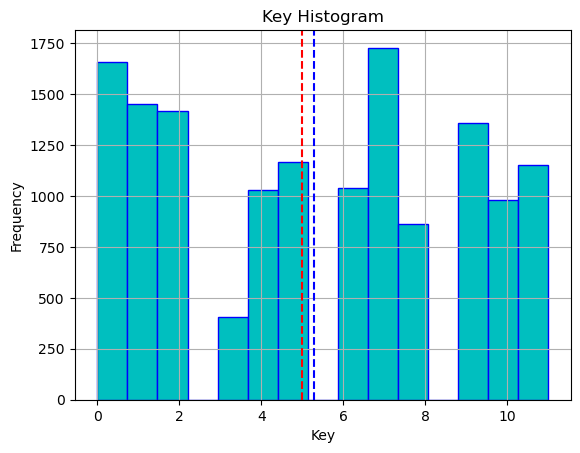

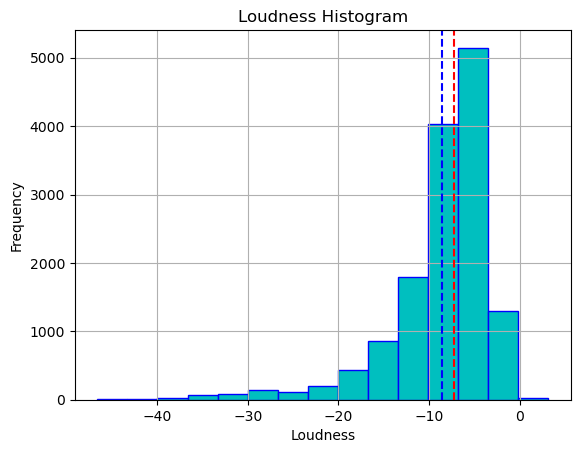

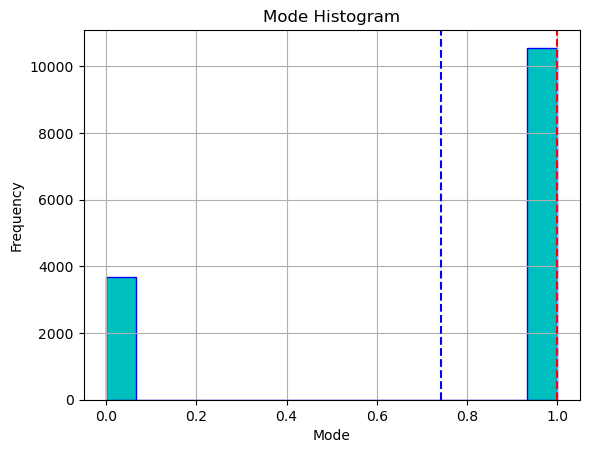

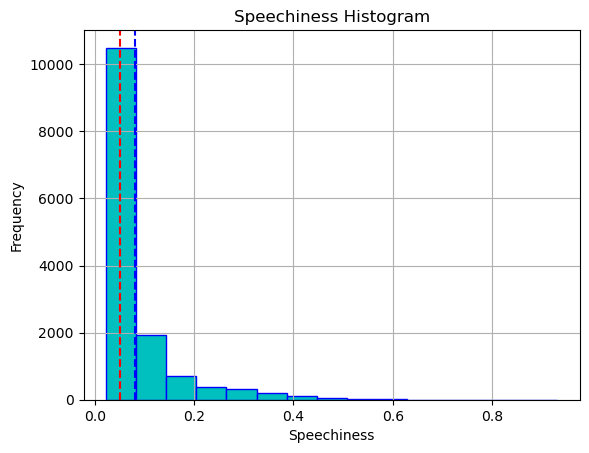

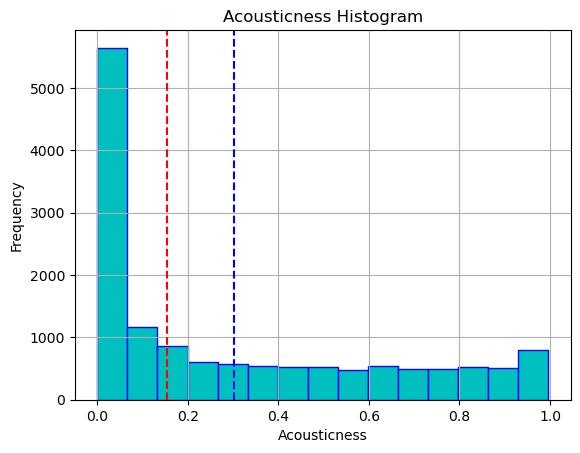

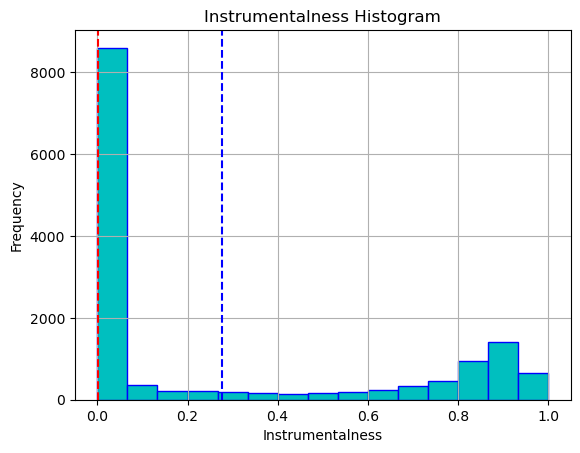

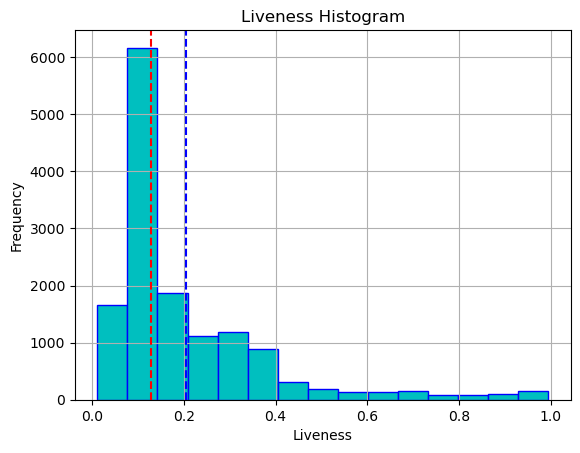

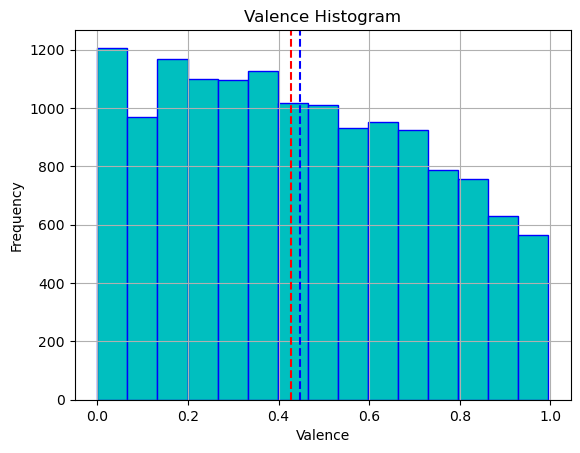

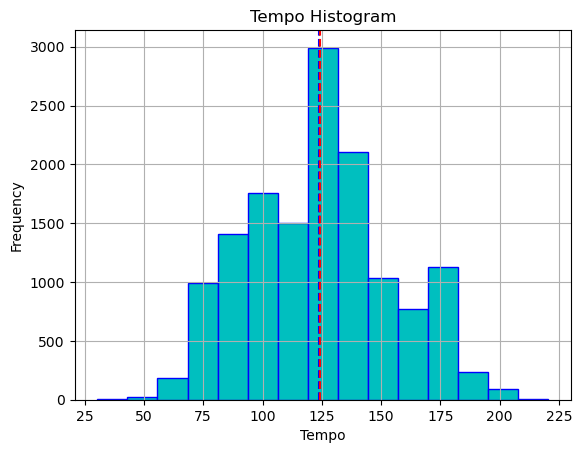

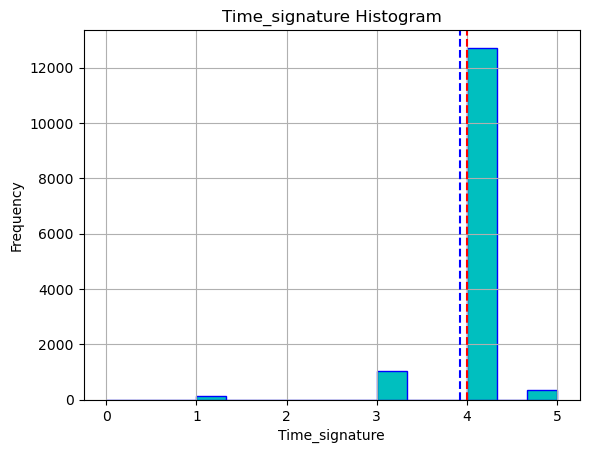

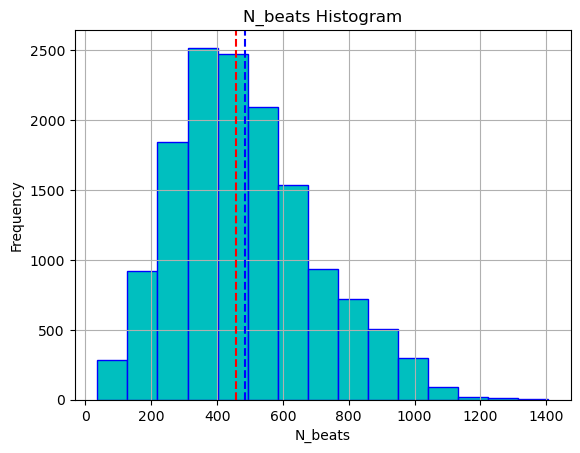

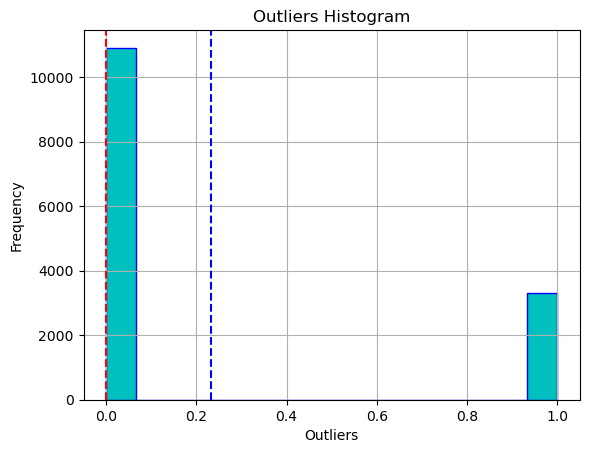

In [48]:
numeric_columns = new_data.select_dtypes(include=['number']).columns

for col in numeric_columns:
        bins_number = math.ceil(math.log2(new_data[col].size)) + 1
        new_data[col].hist(bins = bins_number, color = 'c', edgecolor = 'b')
        mean_value = new_data[col].mean()
        #mode_value = master[col].mode()
        median_value = new_data[col].median()
        plt.ticklabel_format(style='plain', axis='x')
        plt.title(str.capitalize(col) + ' Histogram')
        plt.xlabel(str.capitalize(col))
        plt.ylabel('Frequency')
        plt.axvline(mean_value, color = 'blue', linestyle = 'dashed')
        #plt.axvline(mode_value[0], color='#FF00FF', linestyle = '--')
        plt.axvline(median_value, color = 'red', linestyle = '--')
        plt.show()